# CS498 Project, Team 31, Phase 1
## Sentiment Analysis of Social Media as a predictor for Bitcoin price volatility

Phase 1 of the project will be to conduct a data exploration of the cryptocurrency historical datasets to ascertain if a correlation can be drawn between Bitcoin price fluctuations and the other major cryptocurrencies. The comparison will be done using the top ten cryptocurrencies by market share. The top ten were chosen based by market cap as of Dec. 7, 2017, according to CoinMarketCap.com. The historical data will be restricted to the last 90 days of the year 2017.

1. Bitcoin (BTC): \$304.52 billion
2. Ethereum (ETH): \$41.55 billion
3. Bitcoin Cash (BCH): \$22.02 billion
4. IOTA (IOT): \$11.59 billion
5. Ripple (XRP): \$8.68 billion
6. Dash (DASH): \$5.38 billion
7. Litecoin (LTC): \$5.32 billion
8. Monero (XMR): \$4.33 billion
9. Bitcoin Gold (BTG): \$4.22 billion
10. Cardano (ADA): \$2.78 billion
11. Ethereum Classic (ETC): \$2.62 billion
12. Stellar Lumens (XLM): \$2.53 billion
13. NEO (NEO): \$2.23 billion

#### Because some coins didnt start trading until late 2017, the following substitutions were made:
* Ethereum classic was exchanged for IOTA
* Stellar Lumens was exchanged for Cardano
* Neo was exchanged for Bitcoin Gold


The datasets used were downloaded from the [CryptoCompare public API](https://www.cryptocompare.com/api/#introduction), we can use the following Python wrapper available on [GitHub: cryCompare](https://github.com/stefs304/cryCompare) to simplfy the API usage.


I would like to claim to be a data science genius and I pulled all the code and techniques used in this notebook from my vast store of knowledge but that would be disingenuous. Since this is a student project it is important to show the sources. I am including links to the sources that I used here:

https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies

https://blog.patricktriest.com/analyzing-cryptocurrencies-python/

https://gmarti.gitlab.io/cryptocurrency/2017/08/25/download-cryptocoins-api-python.html

https://medium.com/@galea/cryptocompare-api-quick-start-guide-ca4430a484d4



In [1]:
# Standard Data Science libraires to be used
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import operator
import pickle
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import sys
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

# This path will need to be modified based on where to save the crycompare library
sys.path.append("C:/Users/Michael/notebooks/CS498/crycompare/")
from crycompare import history as h 
from crycompare import price as p 

%matplotlib inline

In [9]:
# Fetch a coin list from CryptoCompare and create a sub list with only coins of interest.
top10_coins = ['BTC', 'ETH', 'BCH', 'ETC','XRP', 'DASH', 'LTC', 'XMR', 'NEO', 'XLM'] # The top ten coins for 2017
# It was not necessary to fetch the coin list, since it is simpler to create a list of the coins we want to fetch.
# coinList = p.coinList()
# top10_coinList = dict((k, coinList[k]) for k in top10_coins if k in coinList)
coins = sorted(top10_coins)
print(coins)

['BCH', 'BTC', 'DASH', 'ETC', 'ETH', 'LTC', 'NEO', 'XLM', 'XMR', 'XRP']


With the histoDay() function, we can fetch the historical data (OHLC prices and volumes) open-high-low-close chart. This cell is now a markdown cell. Since we all ready fetched and pickeled the data down below.

```python
df_dict = {}
for coin in coins:
    # limit to 90 days. toTs = 12/31/2017. The website https://www.unixtimestamp.com/ can be used tio create the 
    # appropriate timestamp.
    history = h.histoDay(coin, 'USD', limit=89, toTs=1514678400, allData=False)
    if histo:
        df_history = pd.DataFrame(history)
        df_history['time'] = pd.to_datetime(df_history['time'],unit='s')
        df_history.index = df_history['time']
        del df_history['time']
        del df_history['volumefrom']
        del df_history['volumeto']
        
        df_dict[coin] = df_history
```

In [71]:
df_dict = {}
for coin in coins:
    # limit to 90 days. toTs = 12/31/2017. The website https://www.unixtimestamp.com/ can be used tio create the 
    # appropriate timestamp.
    history = h.histoDay(coin, 'USD', limit=89, toTs=1514678400, allData=False)
    if history:
        df_history = pd.DataFrame(history)
        df_history['time'] = pd.to_datetime(df_history['time'],unit='s')
        df_history.index = df_history['time']
        del df_history['high']
        del df_history['low']
        del df_history['open']
        del df_history['time']
        del df_history['volumefrom']
        del df_history['volumeto']

        df_dict[coin] = df_history

In [77]:
'''
# The first data pass creating the initial dataframe.
# We store all info in a dataframe with 2-level columns: 
# the first level contains the coin names, the second one, the OHLC prices.
top10_coin_history = pd.concat(df_dict.values(), axis=1, keys=df_dict.keys())
# We reset the index so the times (dates) are a now a column
top10_coin_history.reset_index(level=0, inplace=True)
'''

# Create a dataframe with close prices and the coin Symbol as the column name.
top10_coin_closing_prices = pd.concat(df_dict.values(), axis=1, keys=df_dict.keys())
# Fetch the column names
mi = top10_coin_closing_prices.columns
# Convert them to a list, since it is two levels it will create a list of tuples
mi.tolist()
# Create a index using on the coin name from the tuple.
ind = pd.Index([e[0] for e in mi.tolist()])
top10_coin_closing_prices.columns = ind
top10_coin_closing_prices.to_pickle("data/top10_coin_closing_prices.pkl")  
print(top10_coin_closing_prices.head())

               BCH      BTC    DASH    ETC     ETH    LTC    NEO      XLM  \
time                                                                        
2017-10-03  401.41  4314.18  294.50  12.29  291.81  52.15  33.57  0.01241   
2017-10-04  355.75  4218.66  303.32  11.79  291.68  51.22  31.17  0.01181   
2017-10-05  354.40  4321.44  305.35  11.91  294.99  51.64  32.28  0.01449   
2017-10-06  363.22  4371.94  305.95  12.33  308.33  52.08  33.49  0.01838   
2017-10-07  359.81  4435.81  311.52  12.37  311.26  52.57  35.88  0.02077   

              XMR     XRP  
time                       
2017-10-03  92.99  0.2033  
2017-10-04  90.24  0.2135  
2017-10-05  91.88  0.2380  
2017-10-06  91.05  0.2334  
2017-10-07  91.61  0.2397  


In [58]:
# We want to save the dataframe so we don't need to access the CryptoCompare API every time
# We are using pickle to save the data. The data was retieved and pickeled on 03/16/2018
# top10_coin_history.to_pickle("data/top10_coins.pkl")  

In [12]:
# Here we reload the pickled dataframe
top10_coin_history = pickle.load(open("data/top10_coins.pkl", "rb" ))

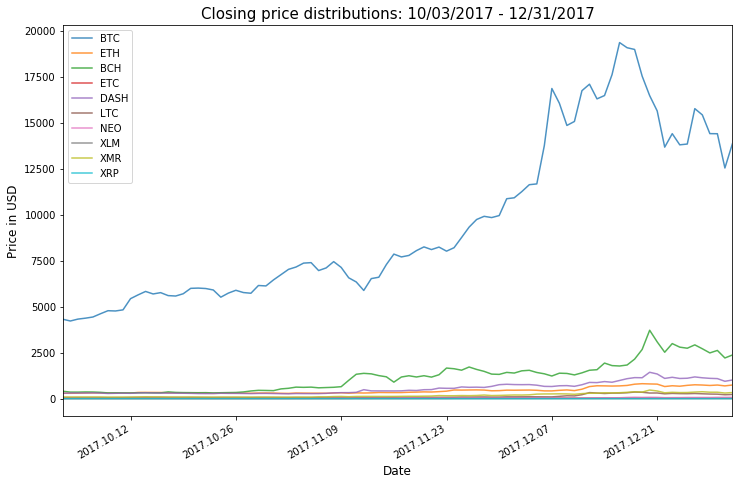

In [79]:
'''
The first step is to plot the closing price of our chosen crypto currencies and observe how 
the price has changed over time. The dataset is unmodified.

import matplotlib.dates as mdates
import datetime
'''

top10_coin_history['Date_map'] = top10_coin_history['time'].apply(lambda x: mdates.date2num(x))

fig, ax = plt.subplots(figsize=(12,8))
plt.plot(top10_coin_history.loc[:,'Date_map'], top10_coin_history.loc[:,('BTC', 'close')], alpha=0.8, color=color[0], label="BTC")
plt.plot(top10_coin_history.loc[:,'Date_map'], top10_coin_history.loc[:,('ETH', 'close')], alpha=0.8, color=color[1], label="ETH")
plt.plot(top10_coin_history.loc[:,'Date_map'], top10_coin_history.loc[:,('BCH', 'close')], alpha=0.8, color=color[2], label="BCH")
plt.plot(top10_coin_history.loc[:,'Date_map'], top10_coin_history.loc[:,('ETC', 'close')], alpha=0.8, color=color[3], label="ETC")
plt.plot(top10_coin_history.loc[:,'Date_map'], top10_coin_history.loc[:,('DASH', 'close')], alpha=0.8, color=color[4], label="DASH")
plt.plot(top10_coin_history.loc[:,'Date_map'], top10_coin_history.loc[:,('LTC', 'close')], alpha=0.8, color=color[5], label="LTC")
plt.plot(top10_coin_history.loc[:,'Date_map'], top10_coin_history.loc[:,('NEO', 'close')], alpha=0.8, color=color[6], label="NEO")
plt.plot(top10_coin_history.loc[:,'Date_map'], top10_coin_history.loc[:,('XLM', 'close')], alpha=0.8, color=color[7], label="XLM")
plt.plot(top10_coin_history.loc[:,'Date_map'], top10_coin_history.loc[:,('XMR', 'close')], alpha=0.8, color=color[8], label="XMR")
plt.plot(top10_coin_history.loc[:,'Date_map'], top10_coin_history.loc[:,('XRP', 'close')], alpha=0.8, color=color[9], label="XRP")
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
ax.set_xlim([datetime.date(2017, 10, 3), datetime.date(2017, 12, 31)])
ax.legend()
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distributions: 10/03/2017 - 12/31/2017", fontsize=15)
plt.show()

In [14]:
# The price levels will need to be normalized to make a better comparison of the crypto currencies.
# based on https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        if feature_name == ('time', ''):
            result[feature_name] = df[feature_name]
        else:  
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [4]:
# Here we reload the pickled dataframe
# top10_coin_history = pickle.load(open("data/top10_coins.pkl", "rb" ))
top10_coin_closing_prices = pickle.load(open("data/top10_coin_closing_prices.pkl", "rb" ))
# Use min/max normaliztion
# normalized_coin_df = normalize(top10_coin_history)
normalized_coin_closing_prices_df = normalize(top10_coin_closing_prices)
# Save the dataframe between sessions
# normalized_coin_df.to_pickle("data/normalized_coin.pkl") 
normalized_coin_closing_prices_df.to_pickle("data/normalized_coin_closing_prices.pkl") 
# Here we reload the pickled dataframe
normalized_coin_df = pickle.load(open("data/normalized_coin.pkl", "rb" ))
normalized_coin_closing_prices_df = pickle.load(open("data/normalized_coin_closing_prices.pkl", "rb" ))

NameError: name 'normalize' is not defined

In [5]:
# Display for confirmation
# normalized_coin_df.head()
normalized_coin_closing_prices_df.head()

NameError: name 'normalized_coin_closing_prices_df' is not defined

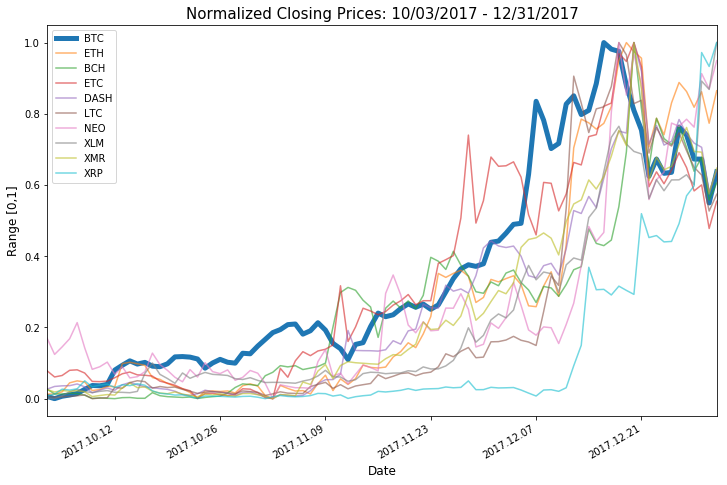

In [80]:
'''
The second step is to plot the normalized closing price of our chosen crypto currencies 
and observe if this gives us a better intuition about the relatioship between coins
The dataset has been normalized.

import matplotlib.dates as mdates
import datetime
'''

normalized_coin_df['Date_map'] = normalized_coin_df['time'].apply(lambda x: mdates.date2num(x))

fig, ax = plt.subplots(figsize=(12,8))
plt.plot(normalized_coin_df.loc[:,'Date_map'], normalized_coin_df.loc[:,('BTC', 'close')], alpha=1.0, color=color[0], linewidth=5, label="BTC")
plt.plot(normalized_coin_df.loc[:,'Date_map'], normalized_coin_df.loc[:,('ETH', 'close')], alpha=0.6, color=color[1], label="ETH")
plt.plot(normalized_coin_df.loc[:,'Date_map'], normalized_coin_df.loc[:,('BCH', 'close')], alpha=0.6, color=color[2], label="BCH")
plt.plot(normalized_coin_df.loc[:,'Date_map'], normalized_coin_df.loc[:,('ETC', 'close')], alpha=0.6, color=color[3], label="ETC")
plt.plot(normalized_coin_df.loc[:,'Date_map'], normalized_coin_df.loc[:,('DASH', 'close')], alpha=0.6, color=color[4], label="DASH")
plt.plot(normalized_coin_df.loc[:,'Date_map'], normalized_coin_df.loc[:,('LTC', 'close')], alpha=0.6, color=color[5], label="LTC")
plt.plot(normalized_coin_df.loc[:,'Date_map'], normalized_coin_df.loc[:,('NEO', 'close')], alpha=0.6, color=color[6], label="NEO")
plt.plot(normalized_coin_df.loc[:,'Date_map'], normalized_coin_df.loc[:,('XLM', 'close')], alpha=0.6, color=color[7], label="XLM")
plt.plot(normalized_coin_df.loc[:,'Date_map'], normalized_coin_df.loc[:,('XMR', 'close')], alpha=0.6, color=color[8], label="XMR")
plt.plot(normalized_coin_df.loc[:,'Date_map'], normalized_coin_df.loc[:,('XRP', 'close')], alpha=0.6, color=color[9], label="XRP")
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
ax.set_xlim([datetime.date(2017, 10, 3), datetime.date(2017, 12, 31)])
ax.legend()
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Range [0,1]', fontsize=12)
plt.title("Normalized Closing Prices: 10/03/2017 - 12/31/2017", fontsize=15)
plt.show()

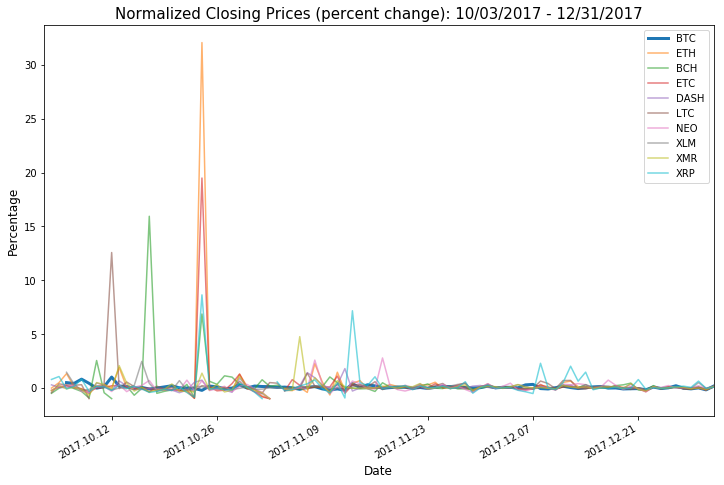

In [18]:
'''
The third step is to plot the percent change of the normalized closing prices
of our chosen crypto currencies and observe if this gives us a better intuition 
about the relatioship between coins.
'''
import matplotlib.dates as mdates
import datetime
normalized_coin_df['Date_map'] = normalized_coin_df['time'].apply(lambda x: mdates.date2num(x))

fig, ax = plt.subplots(figsize=(12,8))
plt.plot(normalized_coin_df.loc[:,'Date_map'], -pct_change(), alpha=0.6, color=color[9], label="XRP")
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
ax.set_xlim([datetime.date(2017, 10, 3), datetime.date(2017, 12, 31)])
ax.legend()
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title("Normalized Closing Prices (percent change): 10/03/2017 - 12/31/2017", fontsize=15)
plt.show()

## Correlation Matrix Plot
Correlation gives an indication of how related the changes are between two variables. If two variables change in the same direction they are positively correlated. If the change in opposite directions together (one goes up, one goes down), then they are negatively correlated.

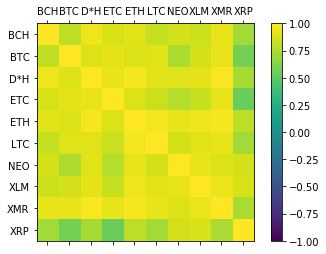

In [87]:
names = ['BCH', 'BTC', 'D*H', 'ETC', 'ETH', 'LTC', 'NEO', 'XLM', 'XMR', 'XRP']
correlations = normalized_coin_closing_prices_df.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

## Scatterplot Matrix
A scatterplot shows the relationship between two variables as dots in two dimensions, one axis for each attribute. You can create a scatterplot for each pair of attributes in your data. Drawing all these scatterplots together is called a scatterplot matrix. Scatter plots are useful for spotting structured relationships between variables

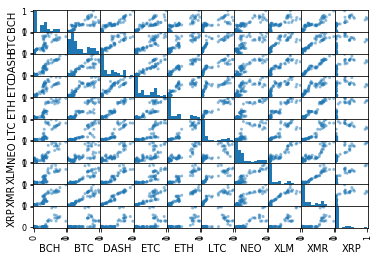

In [92]:
scatter_matrix(normalized_coin_closing_prices_df)
plt.show()

In [2]:
def df_scatter(df, title, seperate_y_axis=False, y_axis_label='', scale='linear', initial_hide=False):
    '''Generate a scatter plot of the entire dataframe'''
    label_arr = list(df)
    series_arr = list(map(lambda col: df[col], label_arr))
    
    layout = go.Layout(
        title=title,
        legend=dict(orientation="h"),
        xaxis=dict(type='date'),
        yaxis=dict(
            title=y_axis_label,
            showticklabels= not seperate_y_axis,
            type=scale
        )
    )
    
    y_axis_config = dict(
        overlaying='y',
        showticklabels=False,
        type=scale )
    
    visibility = 'visible'
    if initial_hide:
        visibility = 'legendonly'
        
    # Form Trace For Each Series
    trace_arr = []
    for index, series in enumerate(series_arr):
        trace = go.Scatter(
            x=series.index, 
            y=series, 
            name=label_arr[index],
            visible=visibility
        )
        
        # Add seperate axis for the series
        if seperate_y_axis:
            trace['yaxis'] = 'y{}'.format(index + 1)
            layout['yaxis{}'.format(index + 1)] = y_axis_config    
        trace_arr.append(trace)

    fig = go.Figure(data=trace_arr, layout=layout)
    py.iplot(fig)

In [7]:
normalized_coin_closing_prices_df = pickle.load(open("data/normalized_coin_closing_prices.pkl", "rb" ))
df_scatter(normalized_coin_closing_prices_df, 'Cryptocurrency Prices', seperate_y_axis=False, y_axis_label='Coin Value', scale='log')